In [30]:
import numpy as np
import numpy.linalg as la
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from sklearn.neighbors import NearestNeighbors
import networkx as nx

#Exercise 3.3 point (3)

A = 
[[0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0.]]
D = 
[[2. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 2.]]
L = 
[[ 2. -1.  0.  0.  0. -1.]
 [-1.  2. -1.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0. -1.  2. -1.]
 [-1.  0.  0.  0. -1.  2.]]



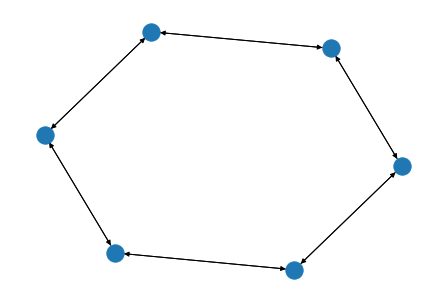

In [31]:
n = 6
A = np.diag(np.ones(n-1),1) + np.diag(np.ones(n-1),-1)
A[0,n-1], A[n-1,0] = 1,1
D = np.diag(2*np.ones(n))
L = D - A

print(f'A = \n{A}\nD = \n{D}\nL = \n{L}\n')

# let's also plot the graph
G=nx.from_numpy_matrix(A,create_using=nx.MultiDiGraph())
nx.draw(G)

(-2.0, 2.0)

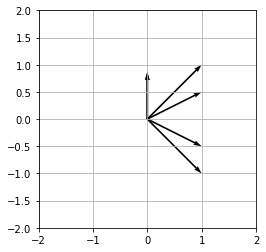

In [32]:
# let's construct explicitily the eigenvectors u_k, v_k for k in {0, 1, 2, 3}
# and store them in the matrix "vectors" as column vectors. We have
# vectors = [u0, u1, u2, u3, v0, v1, v2, v3] where u_k, v_k are column vectors

vectors = np.zeros((n,2*4))
for k in range(4):  
  for i in range(n):
    vectors[i,k] = np.sin(2*np.pi*k*i/n)
    vectors[i,k+4] = np.cos(2*np.pi*k*i/n)  

# to plot u_k, v_k (we mean their projection on R^2) we'll use the following variables.
# we'll use (X, Y) to indicate the origin and (U, V) to indicate the extreme points of the eigenvectors 
X = np.zeros(8)
Y= np.zeros(8)
U = vectors[0,:] # first components of u_k, v_k
V = vectors[1,:] # second components of u_k, v_k

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V, units='xy' ,scale=1)

plt.grid()

ax.set_aspect('equal')

plt.xlim(-2,2)
plt.ylim(-2,2)

In [33]:
# We notice that some eigenvectors don't seem to show up in the plot, that's because their magnitude is too small, namely:
print(f'[u0, u1, u2, u3] = \n{vectors[:,:4]}')

[u0, u1, u2, u3] = 
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  8.66025404e-01  8.66025404e-01  1.22464680e-16]
 [ 0.00000000e+00  8.66025404e-01 -8.66025404e-01 -2.44929360e-16]
 [ 0.00000000e+00  1.22464680e-16 -2.44929360e-16  3.67394040e-16]
 [ 0.00000000e+00 -8.66025404e-01  8.66025404e-01 -4.89858720e-16]
 [ 0.00000000e+00 -8.66025404e-01 -8.66025404e-01  2.38868024e-15]]


#Exercise 4

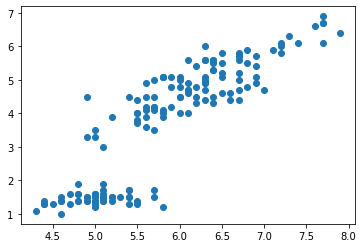

In [34]:
# import iris dataset using sklearn
iris = datasets.load_iris()
# let's extract first and third columns 
X = iris.data[:, [0,2]]
# let's have a look at the points in the dataset
plt.scatter(X[:,0],X[:,1])
plt.show()

In [35]:
# number of points in the dataset
n = X.shape[0]

# number of neighbors to use to construct the graph (note that for each point, one of the k nearest neighbors will always be the point itself)
k=6

# Adjacency matrix of graph using sklearn
nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(X)
distances, indices = nbrs.kneighbors(X)

A = np.zeros((n,n))
# let's fill the Adjacency matrix
for i in range(n):
  for j in range(n):
    if ((j in indices[i]) or (i in indices[j])) and (i!=j):
      A[i,j]=1
    else:
      A[i,j]=0

print(f'Adjacency matrix A = \n{A}\n')
# check if A is symmetric
print(f'A is symmetric: {(A==A.T).all()}\n')

# Degree matrix of graph
D = np.diag(np.sum(A, axis=1))
print(f'\nDeegre matrix\n{D}')

# Laplacian matrix of graph
L = D - A
print(f'\nLaplacian matrix\n{L}')

# first 6 eigenpairs of L
eigenValues, eigenVectors = la.eig(L)

# let's sort the eigenpairs in increasing order w.r.t. the eigenvalues
idx = eigenValues.argsort()[::1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

print(f'\nfirst 6 eigenvalues: \n{eigenValues[:6]}')
print(f'\nand related eigenvectors: \n{eigenVectors[:6]}')

Adjacency matrix A = 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

A is symmetric: True


Deegre matrix
[[9. 0. 0. ... 0. 0. 0.]
 [0. 7. 0. ... 0. 0. 0.]
 [0. 0. 6. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 5. 0. 0.]
 [0. 0. 0. ... 0. 5. 0.]
 [0. 0. 0. ... 0. 0. 6.]]

Laplacian matrix
[[9. 0. 0. ... 0. 0. 0.]
 [0. 7. 0. ... 0. 0. 0.]
 [0. 0. 6. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 5. 0. 0.]
 [0. 0. 0. ... 0. 5. 0.]
 [0. 0. 0. ... 0. 0. 6.]]

first 6 eigenvalues: 
[8.32667268e-17 8.88178420e-16 3.29843456e-02 8.98201310e-02
 1.51967057e-01 1.96710060e-01]

and related eigenvectors: 
[[ 1.41421356e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.72023748e-02  0.00000000e+00  0.00000000e+00  8.92529446e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.90193962e-01  0.00000000e+00  0.00000000e+00  1.38623103e-01
   0.00000000e+00  0.00000000e+00 -1.10671540e

[[0.14142136 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136]
 [0.         0.         0.         0.         0.         0.        ]]


(-0.2, 0.2)

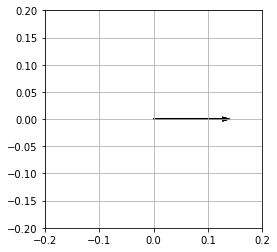

In [36]:
# to plot the first 6 eigenvectors (we mean their projection on R^2) we'll use the following variables.
# we'll use (X_coord, Y_coord) to indicate the origin and (U_coord, V_coord) to indicate the extreme points of the eigenvectors 

eigenvects = eigenVectors[:6]

# matrix in which we'll store the first two components of each of the first 6 eigenvectors
vectors = np.zeros((2, 6))
for i in range(len(eigenvects)):
  vectors[:,i] = eigenvects[i][:2]

# let's have a look at these projections
print(vectors)

X_coord = np.zeros(6)
Y_coord = np.zeros(6)
U_coord = vectors[0,:] # first components
V_coord = vectors[1,:] # second components

fig, ax = plt.subplots()
q = ax.quiver(X_coord, Y_coord, U_coord, V_coord, units='xy' ,scale=1)

plt.grid()

ax.set_aspect('equal')

plt.xlim(-0.2,0.2)
plt.ylim(-0.2,0.2)

We could also implement a custom function to calculate the neighbors of each point in the dataset, without relying on sklearn library. That's exactly what we do in the following cell.

In [37]:
# function which returns a list of (index, distance) of the k nearest neighbors of point in dataset
def k_neighbors(point, dataset, k):
  neighbors = {}
  for i in range(dataset.shape[0]):
    neighbors[i]=la.norm(point-dataset[i,:])
  lst = list(neighbors.items())
  lst.sort(key=lambda x: x[1], reverse=False)
  return lst[:k]

# for each point in the dataset let's calculate the indexes of its k nearest neighbors
k_neighs = {}
for i in range(X.shape[0]):  
  k_neighs[i] = [tpl[0] for tpl in k_neighbors(X[i,:], X, k)]

# let's use these neighbors to construct the adjacency matrix A2 of the graph
A2 = np.zeros((n,n))
for i in range(n):
  for j in range(n):
    if ((j in k_neighs[i]) or (i in k_neighs[j])) and (i!=j):
      A2[i,j]=1
    else:
      A2[i,j]=0
    
# check if A2 is symmetric
print(f'A2 is symmetric: {(A2==A2.T).all()}\n')

A2 is symmetric: True



In [38]:
# Note that the two adjacency matrixes might be different! That's because given a point P, there might be multiple points at the same distance from P
# and it might happen that the custom function we built and the sklearn method break ties differently
print(f'Are the two adjacency matrixes equal? {(A==A2).all()}')

# for example, for k=5 we have
nbrs_example = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(X)
distances_example, indices_example = nbrs_example.kneighbors(X)
print(f'5 nearest neighbors of X[97,:] as found by sklearn method: {indices_example[97]}')
print(f'5 nearest neighbors X[97,:] as found by custom function: {[tpl[0] for tpl in k_neighbors(X[97,:], X, 5)]}')

# the neighbors are different because the distances are the same and ties are broken differently
print(f'distance between X[97] and X[51]: {la.norm(X[97,:]-X[51,:])}')
print(f'distance between X[97] and X[78]: {la.norm(X[97,:]-X[78,:])}')

Are the two adjacency matrixes equal? False
5 nearest neighbors of X[97,:] as found by sklearn method: [97 87 74 68 78]
5 nearest neighbors X[97,:] as found by custom function: [97, 87, 68, 74, 51]
distance between X[97] and X[51]: 0.2828427124746193
distance between X[97] and X[78]: 0.2828427124746193


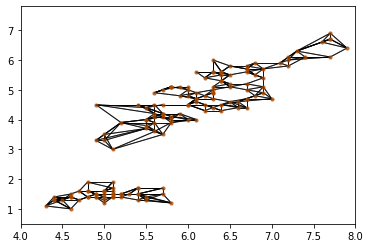

In [39]:
# finally let's plot the k-neighbors graph we built
G=nx.from_numpy_matrix(A,create_using=nx.MultiDiGraph())
G.edges(data=True)
positions = {}
for i in range(X.shape[0]):
  positions[i] = X[i,:]


fig, ax = plt.subplots()
nx.draw_networkx(G, pos=positions, node_size=10, node_color='#AB4A00', alpha=0.7, with_labels=False, arrows=False, ax=ax)
plt.axis("on")
ax.set_xlim(4, 8)
ax.set_ylim(0.5,7.8)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()

Clearly, as k increases the network tends to have only 1 connected component, with many many edges.

In [ ]:
# THIS CELL IS USELESS!! (it's just a different way to plot the network, but it has some visualization issues)

# # in the following we try to plot the graph using adjacency matrix. The method works fine but the final visualization is not so good given the points are 
# # dense in a small region

# def add_edge_to_graph(G, e1, e2, w):
#   G.add_edge(tuple(e1), tuple(e2), weight=1)


# G = nx.Graph()
# points = X
# edges = [(i,j,1) for i in range(n) for j in range(n) if A[i,j]==1]

# for i in range(len(edges)):
#     add_edge_to_graph(G, points[edges[i][0]], points[edges[i][1]], edges[i][2]) # connectionstyle='arc3,rad=0.2')

# # you want your own layout
# #pos = nx.spring_layout(G)
# pos = {tuple(point): point for point in points}

# # add axis
# fig, ax = plt.subplots()
# nx.draw(G, pos=pos, node_color='k', alpha=0.01, ax=ax)
# nx.draw(G, pos=pos, node_size=7, ax=ax)  # draw nodes and edges
# # nx.draw_networkx_labels(G, pos=pos)  # draw node labels/names
# # # draw edge weights
# # labels = nx.get_edge_attributes(G, 'weight')
# # nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
# plt.axis("on")
# ax.set_xlim(4, 8)
# ax.set_ylim(0.5,7.8)
# ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
# plt.show()